# Feature Engineering

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# shows plots in jupyter notebook
%matplotlib inline

# set plot style
sns.set(color_codes=True)

In [3]:
client_df = pd.read_csv('../data/client_data.csv')
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df = pd.read_csv('../data/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# group off-peak prices by companies and month
monthly_average_price_by_id = price_df.groupby(['id', 'price_date']).mean().reset_index()
monthly_average_price_by_id.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [8]:
# calculate the mean of the monthly average prices
mean = monthly_average_price_by_id.groupby(['id']).mean().reset_index()
mean.rename(columns={
    'price_off_peak_var': 'off_peak_mean_energy',
    'price_off_peak_fix': 'off_peak_mean_power',
    'price_peak_var': 'peak_mean_energy',
    'price_peak_fix': 'peak_mean_power',
    'price_mid_peak_var': 'mid_peak_mean_energy',
    'price_mid_peak_fix': 'mid_peak_mean_power'
}, inplace=True)
mean = mean[['id', 'off_peak_mean_energy', 'off_peak_mean_power', 'mid_peak_mean_energy', 'mid_peak_mean_power', 'peak_mean_energy', 'peak_mean_power']]
mean.head()

,id,off_peak_mean_energy,off_peak_mean_power,mid_peak_mean_energy,mid_peak_mean_power,peak_mean_energy,peak_mean_power
0,0002203ffbb812588b632b9e628cc38d,0.124338,40.701732,0.073160,16.280694,0.103794,24.421038
1,0004351ebdd665e6ee664792efc4fd13,0.146426,44.385450,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,45.319710,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,40.647427,0.069032,16.258971,0.098292,24.388455
4,00114d74e963e47177db89bc70108537,0.147926,44.266930,0.000000,0.000000,0.000000,0.000000


In [9]:
# get january and december prices
jan_prices = monthly_average_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_average_price_by_id.groupby('id').last().reset_index()

# calculate the difference
diff = pd.merge(dec_prices, jan_prices.drop(columns='price_date'), on='id')
diff['off_peak_diff_energy'] = diff['price_off_peak_var_x'] - diff['price_off_peak_var_y']
diff['off_peak_diff_power'] = diff['price_off_peak_fix_x'] - diff['price_off_peak_fix_y']
diff['mid_peak_diff_energy'] = diff['price_mid_peak_var_x'] - diff['price_mid_peak_var_y']
diff['mid_peak_diff_power'] = diff['price_mid_peak_fix_x'] - diff['price_mid_peak_fix_y']
diff['peak_diff_energy'] = diff['price_peak_var_x'] - diff['price_peak_var_y']
diff['peak_diff_power'] = diff['price_peak_fix_x'] - diff['price_peak_fix_y']
diff = diff[['id', 'off_peak_diff_energy','off_peak_diff_power', 'mid_peak_diff_energy', 'mid_peak_diff_power', 'peak_diff_energy', 'peak_diff_power']]
diff.head()

,id,off_peak_diff_energy,off_peak_diff_power,mid_peak_diff_energy,mid_peak_diff_power,peak_diff_energy,peak_diff_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.003487,0.065166,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,0.000763,0.065166,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


In [10]:
mean.describe()

,off_peak_mean_energy,off_peak_mean_power,mid_peak_mean_energy,mid_peak_mean_power,peak_mean_energy,peak_mean_power
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,0.141022,43.334758,0.030503,6.411368,0.054636,10.625528
std,0.024184,5.342514,0.036016,7.718998,0.049505,12.756070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.124068,40.688156,0.000000,0.000000,0.000000,0.000000
50%,0.147251,44.281745,0.000000,0.000000,0.085936,0.000000
75%,0.150171,44.370635,0.072525,16.248109,0.102290,24.388455
max,0.278759,59.444710,0.102951,16.818917,0.196275,36.490692


In [11]:
diff.describe()

,off_peak_diff_energy,off_peak_diff_power,mid_peak_diff_energy,mid_peak_diff_power,peak_diff_energy,peak_diff_power
count,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,-0.004545,0.279544,0.000399,-0.028724,-0.000976,-0.048744
std,0.012778,1.432820,0.007403,1.463097,0.011173,2.338325
min,-0.148477,-44.266931,-0.098720,-16.724389,-0.143815,-36.344726
25%,-0.008161,0.000004,0.000000,0.000000,-0.003317,0.000000
50%,-0.005610,0.162916,0.000000,0.000000,0.000000,0.000000
75%,-0.003573,0.177779,0.000718,0.065166,0.000000,0.097749
max,0.168958,40.728885,0.103502,16.791555,0.148474,36.490689


In [12]:
# merge with client data
price_stats = pd.merge(mean, diff, on='id')
client_df = pd.merge(client_df, price_stats, on='id', how='left')

In [13]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
off_peak_mean_energy              0
off_peak_mean_power         

In [14]:
# plot the distribution of the difference by churn
def plot_price(period='off_peak', stat='diff'):
    fig, axes = plt.subplots(2, 2, figsize=(5, 5))

    # energy price difference - histogram
    sns.histplot(data=client_df.loc[client_df['churn'] == 0], x=f'{period}_{stat}_energy', stat='density', ax=axes[0, 0], bins=30, label='no churn')
    sns.histplot(data=client_df.loc[client_df['churn'] == 1], x=f'{period}_{stat}_energy', stat='density', ax=axes[0, 0], bins=30, label='churn')
    axes[0, 0].set_title('Energy')
    axes[0, 0].legend()
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel('')

    # power price difference - histogram
    sns.histplot(data=client_df.loc[client_df['churn'] == 0], x=f'{period}_{stat}_power', stat='density', ax=axes[0, 1], bins=30, label='no churn')
    sns.histplot(data=client_df.loc[client_df['churn'] == 1], x=f'{period}_{stat}_power', stat='density', ax=axes[0, 1], bins=30, label='churn')
    axes[0, 1].legend()
    axes[0, 1].set_title('Power')
    axes[0, 1].legend()
    axes[0, 1].set_xlabel('')
    axes[0, 1].set_ylabel('')

    # energy price difference - boxplot
    sns.boxplot(data=client_df, x='churn', y=f'{period}_{stat}_energy', ax=axes[1, 0])
    axes[1, 0].set_ylabel('')

    # power price difference - boxplot
    sns.boxplot(data=client_df, x='churn', y=f'{period}_{stat}_power', ax=axes[1, 1])
    axes[1, 1].set_ylabel('')

    plt.suptitle(f'{period.upper()} Price {stat.capitalize()}')
    plt.tight_layout()
    plt.show()
    plt.close()

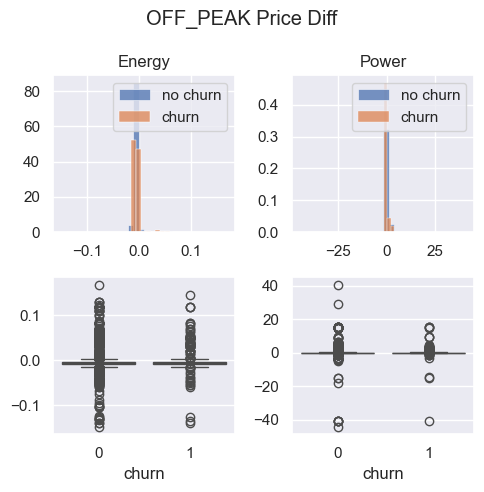

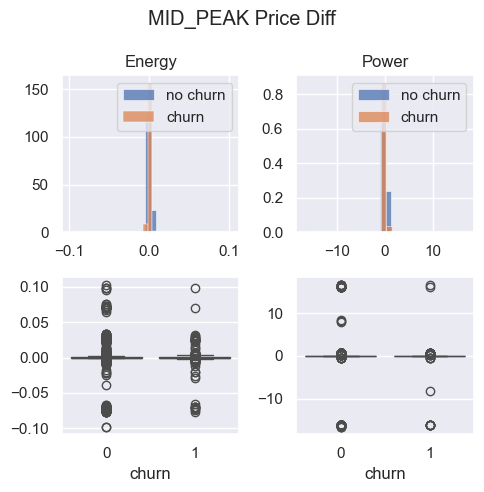

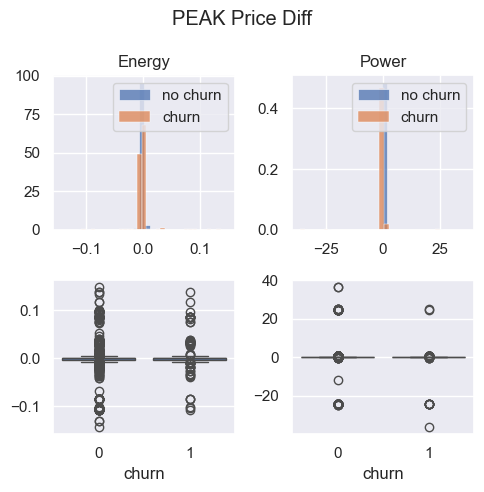

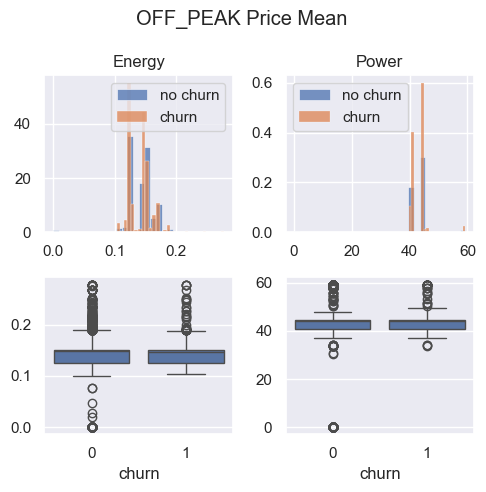

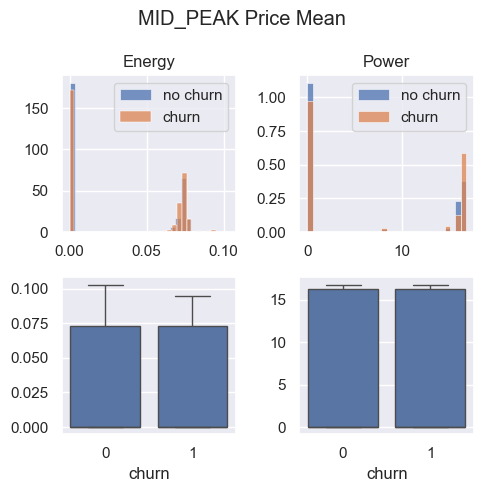

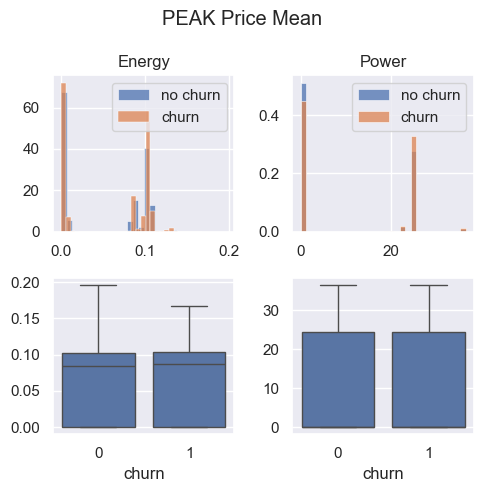

In [15]:
stats = ['diff', 'mean']
periods = ['off_peak', 'mid_peak', 'peak']
for stat in stats:
    for period in periods:
        plot_price(period, stat)

In [16]:
client_df.drop(columns=['mid_peak_diff_energy', 'mid_peak_diff_power', 'peak_diff_energy', 'peak_diff_power', 'mid_peak_mean_energy', 'mid_peak_mean_power', 'peak_mean_energy', 'peak_mean_power'], inplace=True)

In [17]:
client_df['origin'] = client_df.origin_up
client_df.loc[client_df['origin'].isin(['MISSING', 'ewxeelcelemmiwuafmddpobolfuxioce', 'usapbepcfoloekilkwsdiboslwaxobdp']), 'origin'] = 'OTHER'

In [18]:
client_df['channel'] = client_df.channel_sales
client_df.loc[client_df['channel'].isin(['epumfxlbckeskwekxbiuasklxalciiuu', 'fixdbufsefwooaasfcxdxadsiekoceaa', 'sddiedcslfslkckwlfkdpoeeailfpeds']), 'channel'] = 'OTHER'

In [19]:
client_df['discount_energy'] = client_df.forecast_discount_energy.apply(lambda x: 'NO_DISCOUNT' if x == 0 else 'DISCOUNT')

In [20]:
client_df['active_products'] = client_df.nb_prod_act.apply(lambda x: 'ONE' if x == 1 else 'MULTIPLE')

In [21]:
client_df['antiquity'] = client_df.num_years_antig.apply(lambda x: 'RECENT' if x <= 5 else 'OLD')

In [22]:
client_df.drop(columns={
    'channel_sales',
    'origin_up',
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal',
    'id',
    'margin_gross_pow_ele',
    'forecast_discount_energy',
    'cons_last_month',
    'forecast_cons_year',
    'forecast_cons_12m',
    'forecast_meter_rent_12m',
    'forecast_price_energy_peak',
    'nb_prod_act',
    'num_years_antig',
    'has_gas'
}, inplace=True)

In [23]:
client_df.rename(columns={
    'forecast_price_energy_off_peak': 'off_peak_forecast_energy',
    'forecast_price_pow_off_peak': 'off_peak_forecast_power'
}, inplace=True)

In [24]:
client_df.dtypes

cons_12m                      int64
cons_gas_12m                  int64
off_peak_forecast_energy    float64
off_peak_forecast_power     float64
imp_cons                    float64
margin_net_pow_ele          float64
net_margin                  float64
pow_max                     float64
churn                         int64
off_peak_mean_energy        float64
off_peak_mean_power         float64
off_peak_diff_energy        float64
off_peak_diff_power         float64
origin                       object
channel                      object
discount_energy              object
active_products              object
antiquity                    object
dtype: object

In [26]:
client_df.to_csv('../data/processed_data.csv', index=False)